# Data Preprocessing

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector

In [5]:
# Pull in the data from the sheet
df = pd.read_csv('letter-recognition.data')

# Reindex columns
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege',
       'xegvy', 'y-ege', 'yegvx']

# Get all rows with their respective classes..
df_letters_H_and_K = df.loc[df['letter'].isin(['H', 'K'])]
df_letters_M_and_Y = df.loc[df['letter'].isin(['M', 'Y'])]
df_letters_S_and_L = df.loc[df['letter'].isin(['S', 'L'])]

In [6]:
# Split data into X and y
X_letters_H_and_K = df_letters_H_and_K.drop('letter', axis = 1)
y_letters_H_and_K = df_letters_H_and_K['letter']

X_letters_M_and_Y = df_letters_M_and_Y.drop('letter', axis = 1)
y_letters_M_and_Y = df_letters_M_and_Y['letter']

X_letters_S_and_L= df_letters_S_and_L.drop('letter', axis = 1)
y_letters_S_and_L = df_letters_S_and_L['letter']

# Scale the features
X_letters_H_and_K_scaled = scale(X_letters_H_and_K)
X_letters_M_and_Y_scaled = scale(X_letters_M_and_Y)
X_letters_S_and_L_scaled = scale(X_letters_S_and_L)

# Split the testing and training data
X_H_and_K_train, X_H_and_K_test, y_H_and_K_train, y_H_and_K_test = train_test_split(X_letters_H_and_K_scaled, y_letters_H_and_K, test_size = 0.1)
X_M_and_Y_train, X_M_and_Y_test, y_M_and_Y_train, y_M_and_Y_test = train_test_split(X_letters_M_and_Y_scaled, y_letters_M_and_Y, test_size = 0.1)
X_S_and_L_train, X_S_and_L_test, y_S_and_L_train, y_S_and_L_test = train_test_split(X_letters_S_and_L_scaled, y_letters_S_and_L, test_size = 0.1)

# Model Fitting

In [27]:
# Run SVM for H and K
hyperparameters = [10, 20, 30, 40, 50]

print('H and K Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = DecisionTreeClassifier(max_depth=value).fit(X_H_and_K_train, y_H_and_K_train)
    scores = cross_val_score(classifier, X_H_and_K_test, y_H_and_K_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

H and K Model Fitting
For the value C: 10
The scores are: [0.86666667 0.93333333 0.83333333 0.72413793 0.89655172]
The mean is: 0.8508045977011495
The standard deviation is: 0.07142140650700066



For the value C: 20
The scores are: [0.83333333 0.9        0.8        0.75862069 0.93103448]
The mean is: 0.8445977011494253
The standard deviation is: 0.06332238051191172



For the value C: 30
The scores are: [0.9        0.93333333 0.83333333 0.72413793 0.89655172]
The mean is: 0.8574712643678162
The standard deviation is: 0.07409648667844904



For the value C: 40
The scores are: [0.86666667 0.93333333 0.8        0.75862069 0.93103448]
The mean is: 0.8579310344827586
The standard deviation is: 0.06974880850228511



For the value C: 50
The scores are: [0.86666667 0.93333333 0.83333333 0.75862069 0.93103448]
The mean is: 0.8645977011494252
The standard deviation is: 0.06534722849641575






Elapsed time: 0.04003620147705078


In [28]:
print('M and Y Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = DecisionTreeClassifier(max_depth=value).fit(X_M_and_Y_train, y_M_and_Y_train)
    scores = cross_val_score(classifier, X_M_and_Y_test, y_M_and_Y_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

M and Y Model Fitting
For the value C: 10
The scores are: [1.         1.         0.90625    0.90322581 1.        ]
The mean is: 0.9618951612903226
The standard deviation is: 0.04667850334251954



For the value C: 20
The scores are: [0.96875    1.         0.875      0.90322581 1.        ]
The mean is: 0.9493951612903226
The standard deviation is: 0.05130800821076249



For the value C: 30
The scores are: [0.96875    1.         0.90625    0.87096774 1.        ]
The mean is: 0.9491935483870968
The standard deviation is: 0.05197782410558661



For the value C: 40
The scores are: [1.         1.         0.9375     0.87096774 0.96774194]
The mean is: 0.955241935483871
The standard deviation is: 0.04812428628334094



For the value C: 50
The scores are: [0.96875    1.         0.9375     0.90322581 1.        ]
The mean is: 0.9618951612903226
The standard deviation is: 0.03738492576290084






Elapsed time: 0.03903555870056152


In [29]:
print('S and L Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = DecisionTreeClassifier(max_depth=value).fit(X_S_and_L_train, y_S_and_L_train)
    scores = cross_val_score(classifier, X_S_and_L_test, y_S_and_L_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

S and L Model Fitting
For the value C: 10
The scores are: [0.87096774 0.93333333 0.96666667 0.93333333 0.93333333]
The mean is: 0.9275268817204301
The standard deviation is: 0.031086986665965852



For the value C: 20
The scores are: [0.87096774 0.93333333 1.         0.96666667 0.93333333]
The mean is: 0.9408602150537634
The standard deviation is: 0.04280596407930171



For the value C: 30
The scores are: [0.87096774 0.93333333 1.         0.96666667 0.93333333]
The mean is: 0.9408602150537634
The standard deviation is: 0.04280596407930171



For the value C: 40
The scores are: [0.87096774 0.93333333 0.96666667 0.96666667 0.9       ]
The mean is: 0.9275268817204301
The standard deviation is: 0.03756121915505916



For the value C: 50
The scores are: [0.87096774 0.93333333 1.         0.93333333 0.9       ]
The mean is: 0.9275268817204301
The standard deviation is: 0.043073073129959366






Elapsed time: 0.040036678314208984


# Model Fitting with Dimension Reduction

In [12]:
# Sequential feature selection for all sets of data

# H and K:
clf = svm.SVC(kernel='linear', C=1)
sfs = SequentialFeatureSelector(clf, n_features_to_select=4)
sfs.fit(X_letters_H_and_K_scaled, y_letters_H_and_K)

# M and Y:
clf2 = svm.SVC(kernel='linear', C=1)
sfs2 = SequentialFeatureSelector(clf2, n_features_to_select=4)
sfs2.fit(X_letters_M_and_Y_scaled, y_letters_M_and_Y)

# S and L:
clf3 = svm.SVC(kernel='linear', C=1)
sfs3 = SequentialFeatureSelector(clf3, n_features_to_select=4)
sfs3.fit(X_letters_S_and_L_scaled, y_letters_S_and_L)

SequentialFeatureSelector(estimator=SVC(C=1, kernel='linear'),
                          n_features_to_select=4)

In [13]:
# Split the testing and training data
X_H_and_K_train, X_H_and_K_test, y_H_and_K_train, y_H_and_K_test = train_test_split(X_letters_H_and_K_scaled, y_letters_H_and_K, test_size = 0.1)
X_M_and_Y_train, X_M_and_Y_test, y_M_and_Y_train, y_M_and_Y_test = train_test_split(X_letters_M_and_Y_scaled, y_letters_M_and_Y, test_size = 0.1)
X_S_and_L_train, X_S_and_L_test, y_S_and_L_train, y_S_and_L_test = train_test_split(X_letters_S_and_L_scaled, y_letters_S_and_L, test_size = 0.1)

In [30]:
# Rerun the models on the dimension reduced datasets
print('H and K Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = DecisionTreeClassifier(max_depth=value).fit(X_H_and_K_train, y_H_and_K_train)
    scores = cross_val_score(classifier, X_H_and_K_test, y_H_and_K_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

H and K Model Fitting
For the value C: 10
The scores are: [0.83333333 0.9        0.83333333 0.65517241 0.93103448]
The mean is: 0.8305747126436783
The standard deviation is: 0.0955962576195743



For the value C: 20
The scores are: [0.9        0.9        0.83333333 0.82758621 0.93103448]
The mean is: 0.8783908045977011
The standard deviation is: 0.04078370842994764



For the value C: 30
The scores are: [0.83333333 0.93333333 0.83333333 0.72413793 0.93103448]
The mean is: 0.8510344827586207
The standard deviation is: 0.07733368868397315



For the value C: 40
The scores are: [0.9        0.9        0.8        0.72413793 0.96551724]
The mean is: 0.8579310344827586
The standard deviation is: 0.08528890539845489



For the value C: 50
The scores are: [0.9        0.93333333 0.86666667 0.68965517 0.89655172]
The mean is: 0.8572413793103448
The standard deviation is: 0.0864147685346726






Elapsed time: 0.039940834045410156


In [31]:
print('M and Y Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = DecisionTreeClassifier(max_depth=value).fit(X_M_and_Y_train, y_M_and_Y_train)
    scores = cross_val_score(classifier, X_M_and_Y_test, y_M_and_Y_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

M and Y Model Fitting
For the value C: 10
The scores are: [0.96875    1.         0.96875    0.90322581 1.        ]
The mean is: 0.9681451612903226
The standard deviation is: 0.035340389898366645



For the value C: 20
The scores are: [1.         1.         0.875      0.87096774 1.        ]
The mean is: 0.9491935483870968
The standard deviation is: 0.0622380044566927



For the value C: 30
The scores are: [0.96875    1.         0.9375     0.90322581 1.        ]
The mean is: 0.9618951612903226
The standard deviation is: 0.03738492576290084



For the value C: 40
The scores are: [0.96875    1.         0.875      0.90322581 1.        ]
The mean is: 0.9493951612903226
The standard deviation is: 0.05130800821076249



For the value C: 50
The scores are: [0.96875    1.         0.875      0.90322581 0.96774194]
The mean is: 0.9429435483870968
The standard deviation is: 0.046325363268925585






Elapsed time: 0.045040130615234375


In [32]:
print('S and L Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = DecisionTreeClassifier(max_depth=value).fit(X_S_and_L_train, y_S_and_L_train)
    scores = cross_val_score(classifier, X_S_and_L_test, y_S_and_L_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

S and L Model Fitting
For the value C: 10
The scores are: [0.93548387 0.93333333 1.         0.96666667 0.93333333]
The mean is: 0.953763440860215
The standard deviation is: 0.02635615260189855



For the value C: 20
The scores are: [0.87096774 0.93333333 1.         0.96666667 0.93333333]
The mean is: 0.9408602150537634
The standard deviation is: 0.04280596407930171



For the value C: 30
The scores are: [0.87096774 0.93333333 1.         0.96666667 0.93333333]
The mean is: 0.9408602150537634
The standard deviation is: 0.04280596407930171



For the value C: 40
The scores are: [0.87096774 0.93333333 1.         0.93333333 0.93333333]
The mean is: 0.9341935483870968
The standard deviation is: 0.04081718163997694



For the value C: 50
The scores are: [0.87096774 0.93333333 1.         0.93333333 0.93333333]
The mean is: 0.9341935483870968
The standard deviation is: 0.04081718163997694






Elapsed time: 0.03903627395629883


# Results

#### Cross Validation Results without Dimension Reduction

###### H vs K

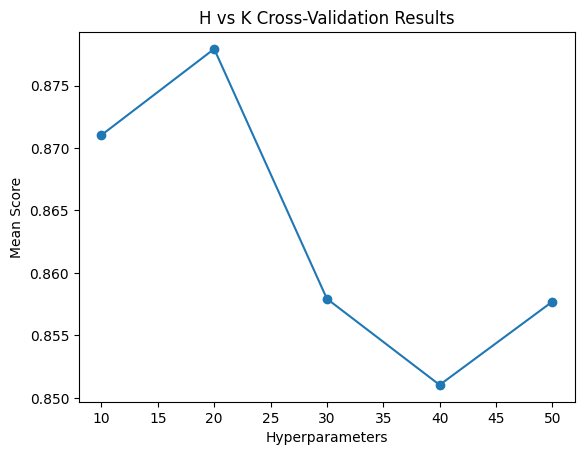

In [33]:
cv_scores = [0.8710344827586207, 0.8779310344827586, 0.8579310344827586, 
         0.8510344827586207, 0.8577011494252874]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('H vs K Cross-Validation Results')

plt.show()


###### M vs Y

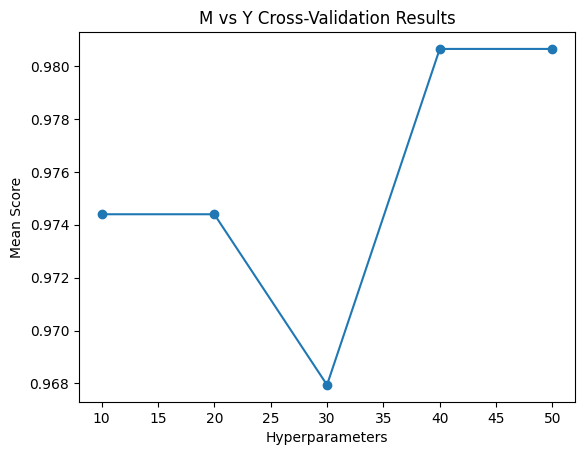

In [39]:
cv_scores = [0.9743951612903226, 0.9743951612903226, 0.9679435483870968, 
         0.9806451612903226, 0.9806451612903226]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('M vs Y Cross-Validation Results')

plt.show()

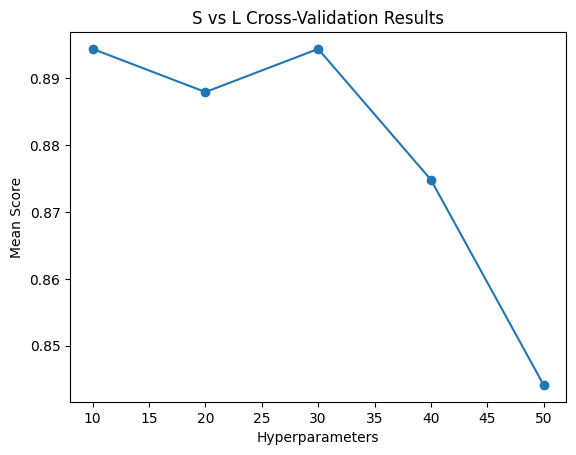

In [35]:
cv_scores = [0.8944086021505375, 0.8879569892473118, 0.8944086021505377, 
         0.8748387096774193, 0.8441379310344829]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('S vs L Cross-Validation Results')

plt.show()

#### Cross Validation Results With Dimension Reduction

###### H vs K

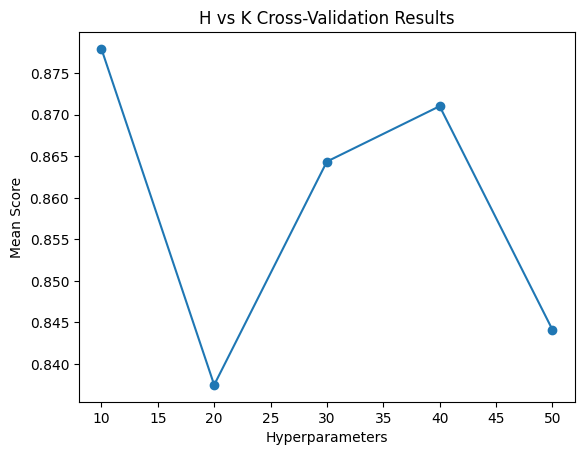

In [36]:
cv_scores = [0.8779310344827588, 0.837471264367816, 0.864367816091954, 
         0.8710344827586207, 0.8441379310344829]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('H vs K Cross-Validation Results')

plt.show()

#### M vs Y

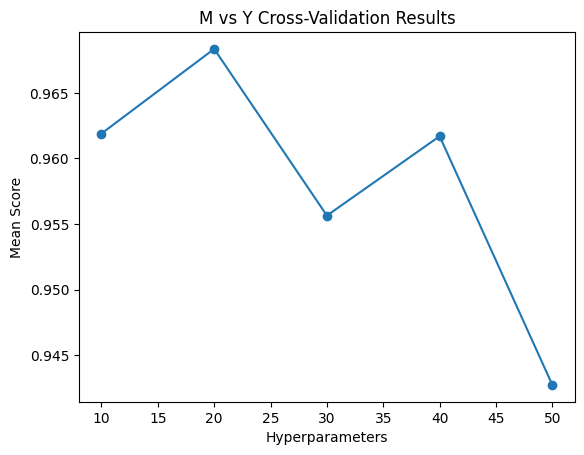

In [37]:
cv_scores = [0.9618951612903226, 0.9683467741935484, 0.9556451612903226, 
         0.9616935483870968, 0.942741935483871]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('M vs Y Cross-Validation Results')

plt.show()

#### S vs L

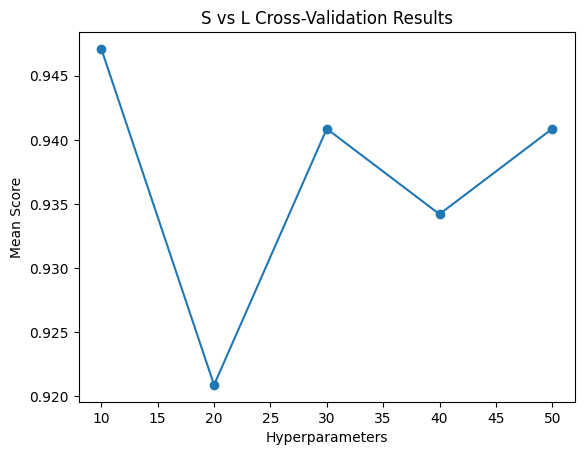

In [38]:
cv_scores = [0.9470967741935483, 0.9208602150537635, 0.9408602150537634, 
         0.9341935483870968, 0.9408602150537634]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('S vs L Cross-Validation Results')

plt.show()